In [1]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models, datasets
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Configure GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define dataset paths
train_data_path = '../datasets/train'
val_data_path = '../datasets/validate'

# Create datasets using ImageFolder
train_dataset = datasets.ImageFolder(root=train_data_path, transform=transform)
val_dataset = datasets.ImageFolder(root=val_data_path, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


In [4]:
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes):
        super(AdvancedCNN, self).__init__()
        self.model = models.resnet18(pretrained=True)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)
        
    def forward(self, x):
        return self.model(x)

# Define number of classes based on the dataset
num_classes = len(train_dataset.classes)
model = AdvancedCNN(num_classes).to(device)


e:\New folder\Project\Object Detection And Rendering\odar\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\New folder\Project\Object Detection And Rendering\odar\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# def train_model(model, train_loader, val_loader, num_epochs=10):
#     best_accuracy = 0.0
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
#         correct_predictions = 0
#         total_samples = 0

#         for images, labels in train_loader:
#             images, labels = images.to(device), labels.to(device)
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             running_loss += loss.item() * images.size(0)
#             _, preds = torch.max(outputs, 1)
#             correct_predictions += torch.sum(preds == labels.data)
#             total_samples += labels.size(0)

#         epoch_loss = running_loss / len(train_loader.dataset)
#         epoch_accuracy = correct_predictions.double() / total_samples

#         # Validation
#         model.eval()
#         val_loss = 0.0
#         val_correct = 0
#         val_total = 0

#         with torch.no_grad():
#             for images, labels in val_loader:
#                 images, labels = images.to(device), labels.to(device)
#                 outputs = model(images)
#                 loss = criterion(outputs, labels)

#                 val_loss += loss.item() * images.size(0)
#                 _, preds = torch.max(outputs, 1)
#                 val_correct += torch.sum(preds == labels.data)
#                 val_total += labels.size(0)

#         val_loss /= len(val_loader.dataset)
#         val_accuracy = val_correct.double() / val_total

#         print(f'Epoch {epoch + 1}/{num_epochs}')
#         print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_accuracy:.4f}')
#         print(f'Val Loss: {val_loss:.4f} Acc: {val_accuracy:.4f}')

#         if val_accuracy > best_accuracy:
#             best_accuracy = val_accuracy
#             torch.save(model.state_dict(), 'best_model.pth')

# train_model(model, train_loader, val_loader)


In [6]:
# Define test dataset and loader
test_data_path = '../datasets/test'
test_dataset = datasets.ImageFolder(root=test_data_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

def evaluate_model(model, test_loader):
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct_predictions += torch.sum(preds == labels.data)
            total_samples += labels.size(0)

    accuracy = correct_predictions.double() / total_samples
    print(f'Test Accuracy: {accuracy:.4f}')

evaluate_model(model, test_loader)


C:\TEMP\ipykernel_384\2815852581.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Accuracy: 1.0000


C:\TEMP\ipykernel_384\1870254240.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


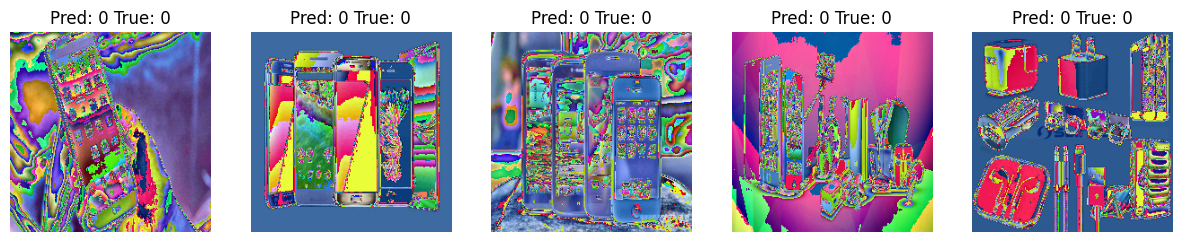

In [7]:
def visualize_predictions(model, val_loader, num_images=5):
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    images, labels = next(iter(val_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(transforms.ToPILImage()(images[i].cpu()))
        ax.set_title(f'Pred: {preds[i].item()} True: {labels[i].item()}')
        ax.axis('off')

    plt.show()

visualize_predictions(model, val_loader)


In [8]:
model.load_state_dict(torch.load('best_model.pth'))
model.eval()


C:\TEMP\ipykernel_384\261288674.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


AdvancedCNN(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [9]:
# Define the transformation for real-time frames
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def detect_and_count_objects(frame, model):
    # Prepare the frame for model input
    image = transform(frame).unsqueeze(0).to(device)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(image)
    
    # Get the predicted class
    _, preds = torch.max(outputs, 1)
    predicted_class = preds.item()
    
    return predicted_class


In [10]:
# Initialize webcam capture
cap = cv2.VideoCapture(0)  # Use '0' for default webcam

# Dictionary to keep track of counts for each class
object_counts = {i: 0 for i in range(num_classes)}

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection and counting
    predicted_class = detect_and_count_objects(frame, model)
    object_counts[predicted_class] += 1
    
    # Display the result on the frame
    label = f'Class: {predicted_class}, Count: {object_counts[predicted_class]}'
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('Live Video Stream', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models, datasets
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Configure GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [12]:
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes):
        super(AdvancedCNN, self).__init__()
        self.model = models.resnet18(pretrained=True)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)
        
    def forward(self, x):
        return self.model(x)

# Define number of classes based on the dataset
num_classes = len(train_dataset.classes)  # Make sure to initialize this correctly
model = AdvancedCNN(num_classes).to(device)
model.load_state_dict(torch.load('best_model.pth'))
model.eval()


C:\TEMP\ipykernel_384\3287943940.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


AdvancedCNN(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [13]:
# Define the transformation for real-time frames
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def detect_objects(frame, model):
    # Prepare the frame for model input
    image = transform(frame).unsqueeze(0).to(device)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(image)
    
    # Get the predicted class
    _, preds = torch.max(outputs, 1)
    predicted_class = preds.item()
    
    return predicted_class


In [14]:
# Initialize webcam capture
cap = cv2.VideoCapture(0)  # Use '0' for default webcam

# Dictionary to keep track of counts for each class
object_counts = defaultdict(int)
last_detected_classes = set()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Detect objects in the current frame
    detected_classes = set()
    height, width, _ = frame.shape
    num_boxes = 0  # Initialize number of boxes detected in the frame

    for y in range(0, height, 224):  # Sliding window approach (adjust step size as needed)
        for x in range(0, width, 224):
            box = frame[y:y+224, x:x+224]
            if box.shape[0] == 224 and box.shape[1] == 224:  # Check for valid size
                predicted_class = detect_objects(box, model)
                detected_classes.add(predicted_class)
                num_boxes += 1

    # Update object counts
    new_classes = detected_classes - last_detected_classes
    removed_classes = last_detected_classes - detected_classes

    for cls in new_classes:
        object_counts[cls] += 1
    for cls in removed_classes:
        object_counts[cls] -= 1

    last_detected_classes = detected_classes

    # Display the result on the frame
    for cls, count in object_counts.items():
        label = f'Class {cls}: {count}'
        cv2.putText(frame, label, (10, 30 + 30*cls), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('Live Video Stream', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [15]:
# def detect_and_draw_boxes(frame, model):
#     height, width, _ = frame.shape
#     boxes = []
#     detected_classes = []

#     # Sliding window approach (adjust step size as needed)
#     for y in range(0, height - 224, 224):  # Ensure the window is within bounds
#         for x in range(0, width - 224, 224):
#             box = frame[y:y+224, x:x+224]
#             if box.shape[0] == 224 and box.shape[1] == 224:  # Check for valid size
#                 image = transform(box).unsqueeze(0).to(device)
                
#                 with torch.no_grad():
#                     outputs = model(image)
                
#                 _, preds = torch.max(outputs, 1)
#                 predicted_class = preds.item()
                
#                 # Draw the bounding box on the frame
#                 boxes.append((x, y, x + 224, y + 224))
#                 detected_classes.append(predicted_class)
    
#     # Draw bounding boxes and labels on the frame
#     for (x1, y1, x2, y2), cls in zip(boxes, detected_classes):
#         color = (0, 255, 0)  # Green color for bounding box
#         label = f'Class {cls}'
#         frame = cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
#         frame = cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
#     return frame


In [16]:
# # Initialize webcam capture
# cap = cv2.VideoCapture(0)  # Use '0' for default webcam

# # Dictionary to keep track of counts for each class
# object_counts = defaultdict(int)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Detect objects and draw bounding boxes
#     frame = detect_and_draw_boxes(frame, model)

#     # Display the result on the frame
#     cv2.imshow('Live Video Stream', frame)

#     # Break the loop on 'q' key press
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the capture and close windows
# cap.release()
# cv2.destroyAllWindows()


In [17]:
# Define the transformation for real-time frames
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def detect_objects(frame, model):
    # Prepare the frame for model input
    image = transform(frame).unsqueeze(0).to(device)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(image)
    
    # Get the predicted class
    _, preds = torch.max(outputs, 1)
    predicted_class = preds.item()
    
    return predicted_class

def draw_bounding_boxes(frame, boxes, class_ids, colors, labels):
    for i, box in enumerate(boxes):
        x, y, w, h = box
        color = tuple(colors[class_ids[i]])  # Ensure color is a tuple of integers
        label = labels[class_ids[i]]
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


In [18]:
# Initialize webcam capture
cap = cv2.VideoCapture(0)  # Use '0' for default webcam

# Colors and labels for bounding boxes
colors = np.random.randint(0, 255, size=(num_classes, 3), dtype=int)
labels = [f'Class {i}' for i in range(num_classes)]

# Dictionary to keep track of counts for each class
object_counts = defaultdict(int)
last_detected_classes = set()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    height, width, _ = frame.shape
    detected_boxes = []
    detected_classes = []

    for y in range(0, height - 224 + 1, 224):  # Adjust to avoid going out of bounds
        for x in range(0, width - 224 + 1, 224):
            box = frame[y:y+224, x:x+224]
            if box.shape[0] == 224 and box.shape[1] == 224:  # Check for valid size
                predicted_class = detect_objects(box, model)
                detected_boxes.append((x, y, 224, 224))
                detected_classes.append(predicted_class)

    # Update object counts
    new_classes = set(detected_classes) - last_detected_classes
    removed_classes = last_detected_classes - set(detected_classes)

    for cls in new_classes:
        object_counts[cls] += 1
    for cls in removed_classes:
        object_counts[cls] -= 1

    last_detected_classes = set(detected_classes)

    # Draw bounding boxes on the frame
    draw_bounding_boxes(frame, detected_boxes, detected_classes, colors, labels)
    
    # Display the result on the frame
    for cls, count in object_counts.items():
        label = f'Class {cls}: {count}'
        cv2.putText(frame, label, (10, 30 + 30*cls), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('Live Video Stream', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Scalar value for argument 'color' is not numeric
>  - Scalar value for argument 'color' is not numeric
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [ ]:
from collections import defaultdict

def draw_bounding_boxes(frame, boxes, class_ids, colors, labels):
    for i, box in enumerate(boxes):
        x, y, w, h = box
        color = tuple(colors[class_ids[i]])  # Ensure color is a tuple of integers
        label = labels[class_ids[i]]
        
        # Debug prints
        print(f"Box Coordinates: (x={x}, y={y}, w={w}, h={h})")
        print(f"Color: {color} (Expected format: tuple of integers)")
        print(f"Label: {label}")

        # Ensure color is a tuple of three integers
        if not isinstance(color, tuple) or len(color) != 3 or not all(isinstance(c, int) for c in color):
            print(f"Invalid color format: {color}")
            continue

        # Draw the rectangle
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        # Put text above the rectangle
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Initialize webcam capture
cap = cv2.VideoCapture(0)  # Use '0' for default webcam

# Colors and labels for bounding boxes
num_classes = 10  # Example number of classes; replace with actual number
colors = np.random.randint(0, 255, size=(num_classes, 3), dtype=int)
labels = [f'Class {i}' for i in range(num_classes)]

# Dictionary to keep track of counts for each class
object_counts = defaultdict(int)
last_detected_classes = set()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    height, width, _ = frame.shape
    detected_boxes = []
    detected_classes = []

    for y in range(0, height - 224 + 1, 224):  # Adjust to avoid going out of bounds
        for x in range(0, width - 224 + 1, 224):
            box = frame[y:y+224, x:x+224]
            if box.shape[0] == 224 and box.shape[1] == 224:  # Check for valid size
                predicted_class = detect_objects(box, model)
                detected_boxes.append((x, y, 224, 224))
                detected_classes.append(predicted_class)

    # Update object counts
    new_classes = set(detected_classes) - last_detected_classes
    removed_classes = last_detected_classes - set(detected_classes)

    for cls in new_classes:
        object_counts[cls] += 1
    for cls in removed_classes:
        object_counts[cls] -= 1

    last_detected_classes = set(detected_classes)

    # Draw bounding boxes on the frame
    draw_bounding_boxes(frame, detected_boxes, detected_classes, colors, labels)
    
    # Display the result on the frame
    for cls, count in object_counts.items():
        label = f'Class {cls}: {count}'
        cv2.putText(frame, label, (10, 30 + 30*cls), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame
    cv2.imshow('Live Video Stream', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models, datasets
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Configure GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes):
        super(AdvancedCNN, self).__init__()
        self.model = models.resnet18(pretrained=True)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)
        
    def forward(self, x):
        return self.model(x)

# Define number of classes based on the dataset
num_classes = len(train_dataset.classes)  # Make sure to initialize this correctly
model = AdvancedCNN(num_classes).to(device)
model.load_state_dict(torch.load('best_model.pth'))
model.eval()


In [ ]:
# Define the transformation for real-time frames
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def detect_objects(frame, model):
    # Prepare the frame for model input
    image = transform(frame).unsqueeze(0).to(device)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(image)
    
    # Get the predicted class
    _, preds = torch.max(outputs, 1)
    predicted_class = preds.item()
    
    return predicted_class

def draw_bounding_box(frame, bbox, color=(0, 255, 0), thickness=2):
    """Draw a bounding box on the image."""
    x1, y1, x2, y2 = bbox
    cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)
    return frame


In [ ]:
# Initialize webcam capture
cap = cv2.VideoCapture(0)  # Use '0' for default webcam

# Dictionary to keep track of counts for each class
object_counts = defaultdict(int)
last_detected_classes = set()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    height, width, _ = frame.shape

    detected_classes = set()
    num_boxes = 0  # Initialize number of boxes detected in the frame

    # Sliding window approach (adjust step size as needed)
    for y in range(0, height, 224):
        for x in range(0, width, 224):
            box = frame[y:y+224, x:x+224]
            if box.shape[0] == 224 and box.shape[1] == 224:  # Check for valid size
                predicted_class = detect_objects(box, model)
                detected_classes.add(predicted_class)
                
                # Draw a bounding box on the original frame (for demonstration, we assume the entire box area)
                bbox = (x, y, x + 224, y + 224)
                frame = draw_bounding_box(frame, bbox)

    # Update object counts
    new_classes = detected_classes - last_detected_classes
    removed_classes = last_detected_classes - detected_classes

    for cls in new_classes:
        object_counts[cls] += 1
    for cls in removed_classes:
        object_counts[cls] -= 1

    last_detected_classes = detected_classes

    # Display the result on the frame
    for cls, count in object_counts.items():
        label = f'Class {cls}: {count}'
        cv2.putText(frame, label, (10, 30 + 30*cls), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Show the frame with masks
    cv2.imshow('Live Video Stream with Masks', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()
